### Tratamento do texto do campo DECISAO do dataset de Acórdãos rotulados

In [1]:
import os, signal

import pandas as pd
import pyperclip as pc
import texthero as hero
import modanez_tools as mt
import matplotlib.pyplot as plt

from datetime import datetime
# from utils import highlight_regex_matches as hl

In [2]:
df_rotulados = mt.read_file('dados/df_rotulados.csv')
df_rotulados.info()

Duration: 0:00:00.229214
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       330 non-null    object
 1   DECISAO  330 non-null    object
 2   LABEL_A  330 non-null    int64 
 3   LABEL_B  330 non-null    int64 
 4   LABEL_C  330 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 13.0+ KB


In [3]:
# Aplicação do regex no texto do dataset de acordaos rotulados
start_time = datetime.now()
df_rotulados.DECISAO = df_rotulados.apply(lambda x: mt.padronizacao(x), axis = 1)
print('Duration: {}'.format(datetime.now() - start_time))
df_rotulados

Duration: 0:02:24.939525


,ID,DECISAO,LABEL_A,LABEL_B,LABEL_C
0,DE-000434-1993-PL,tribunal pleno razões postas relator decide un...,5,7,0
1,DE-000767-1998-PL,tribunal pleno razões aposta relator decide co...,2,0,0
2,DE-000681-1998-PL,tribunal pleno razões postas relator decide co...,2,0,0
3,DE-000279-1998-PL,plenário tribunal razões postas relator fulcro...,5,7,0
4,DE-000348-1999-PL,tribunal pleno razões postas relator decide co...,5,7,0
...,...,...,...,...,...
325,AC-002740-2018-PL,relatório adoto relatório instrução auditor co...,2,7,0
326,AC-002939-2018-PL,relatório trata-se representação apresentada c...,8,0,0
327,AC-002743-2018-PL,relatório trata-se apartado auditoria conformi...,2,0,0
328,AR-002346-2018-PL,acórdão acórdão plenário ministros reunidos se...,2,0,0


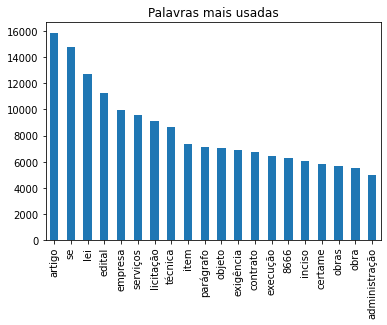

In [4]:
top_20 = hero.visualization.top_words(hero.remove_punctuation(df_rotulados.DECISAO)).head(20)

top_20.plot.bar(rot=90, title='Palavras mais usadas')

plt.show(block=True)

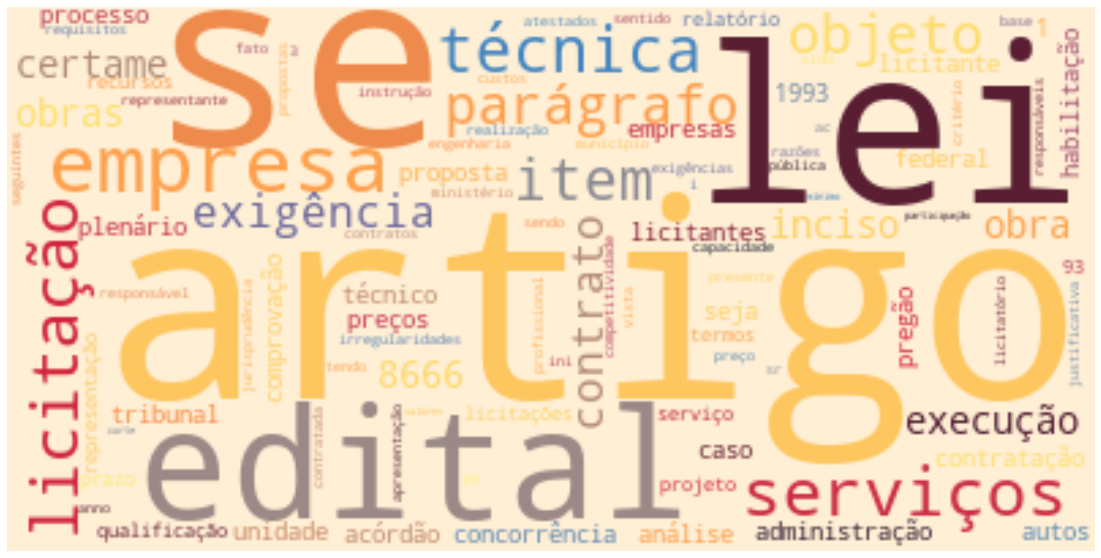

In [5]:
hero.wordcloud(hero.remove_punctuation(df_rotulados.DECISAO), max_words=100)

In [6]:
# pc.copy(df_rotulados.iloc[177].DECISAO)

In [7]:
df_rotulados = pd.DataFrame(df_rotulados.groupby(['ID', 'DECISAO'])['LABEL_A','LABEL_B', 'LABEL_C'].apply(lambda x: tuple(x.values)))
df_rotulados.reset_index(inplace=True)
df_rotulados = df_rotulados.rename(columns={0: 'LABELS'})

for index, row in df_rotulados.iterrows():
    df_rotulados.iloc[index].LABELS = ','.join([str(elem) for elem in df_rotulados.iloc[index].LABELS[0]])

new_cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
new_vals = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
df_rotulados = df_rotulados.reindex(columns=df_rotulados.columns.tolist()+new_cols)
df_rotulados[new_cols] = new_vals

for index, row in df_rotulados.iterrows():
    labels = df_rotulados.iloc[index].LABELS.split(',')
    for i in range(0, 3):
        if int(labels[i])>0:
            df_rotulados.iloc[index, int(labels[i])+2] = 1

# df_rotulados

<ipython-input-7-ff75a172ede4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rotulados = pd.DataFrame(df_rotulados.groupby(['ID', 'DECISAO'])['LABEL_A','LABEL_B', 'LABEL_C'].apply(lambda x: tuple(x.values)))


In [8]:
df_rotulados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       330 non-null    object
 1   DECISAO  330 non-null    object
 2   LABELS   330 non-null    object
 3   1        330 non-null    int64 
 4   2        330 non-null    int64 
 5   3        330 non-null    int64 
 6   4        330 non-null    int64 
 7   5        330 non-null    int64 
 8   6        330 non-null    int64 
 9   7        330 non-null    int64 
 10  8        330 non-null    int64 
 11  9        330 non-null    int64 
 12  10       330 non-null    int64 
 13  11       330 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 36.2+ KB


In [9]:
df_rotulados.DECISAO = hero.remove_diacritics(df_rotulados.DECISAO)

In [10]:
mt.save_file(df_rotulados,'dados/df_rotulados_spel_diac.csv')

In [ ]:
os.kill(os.getpid(), signal.SIGKILL)